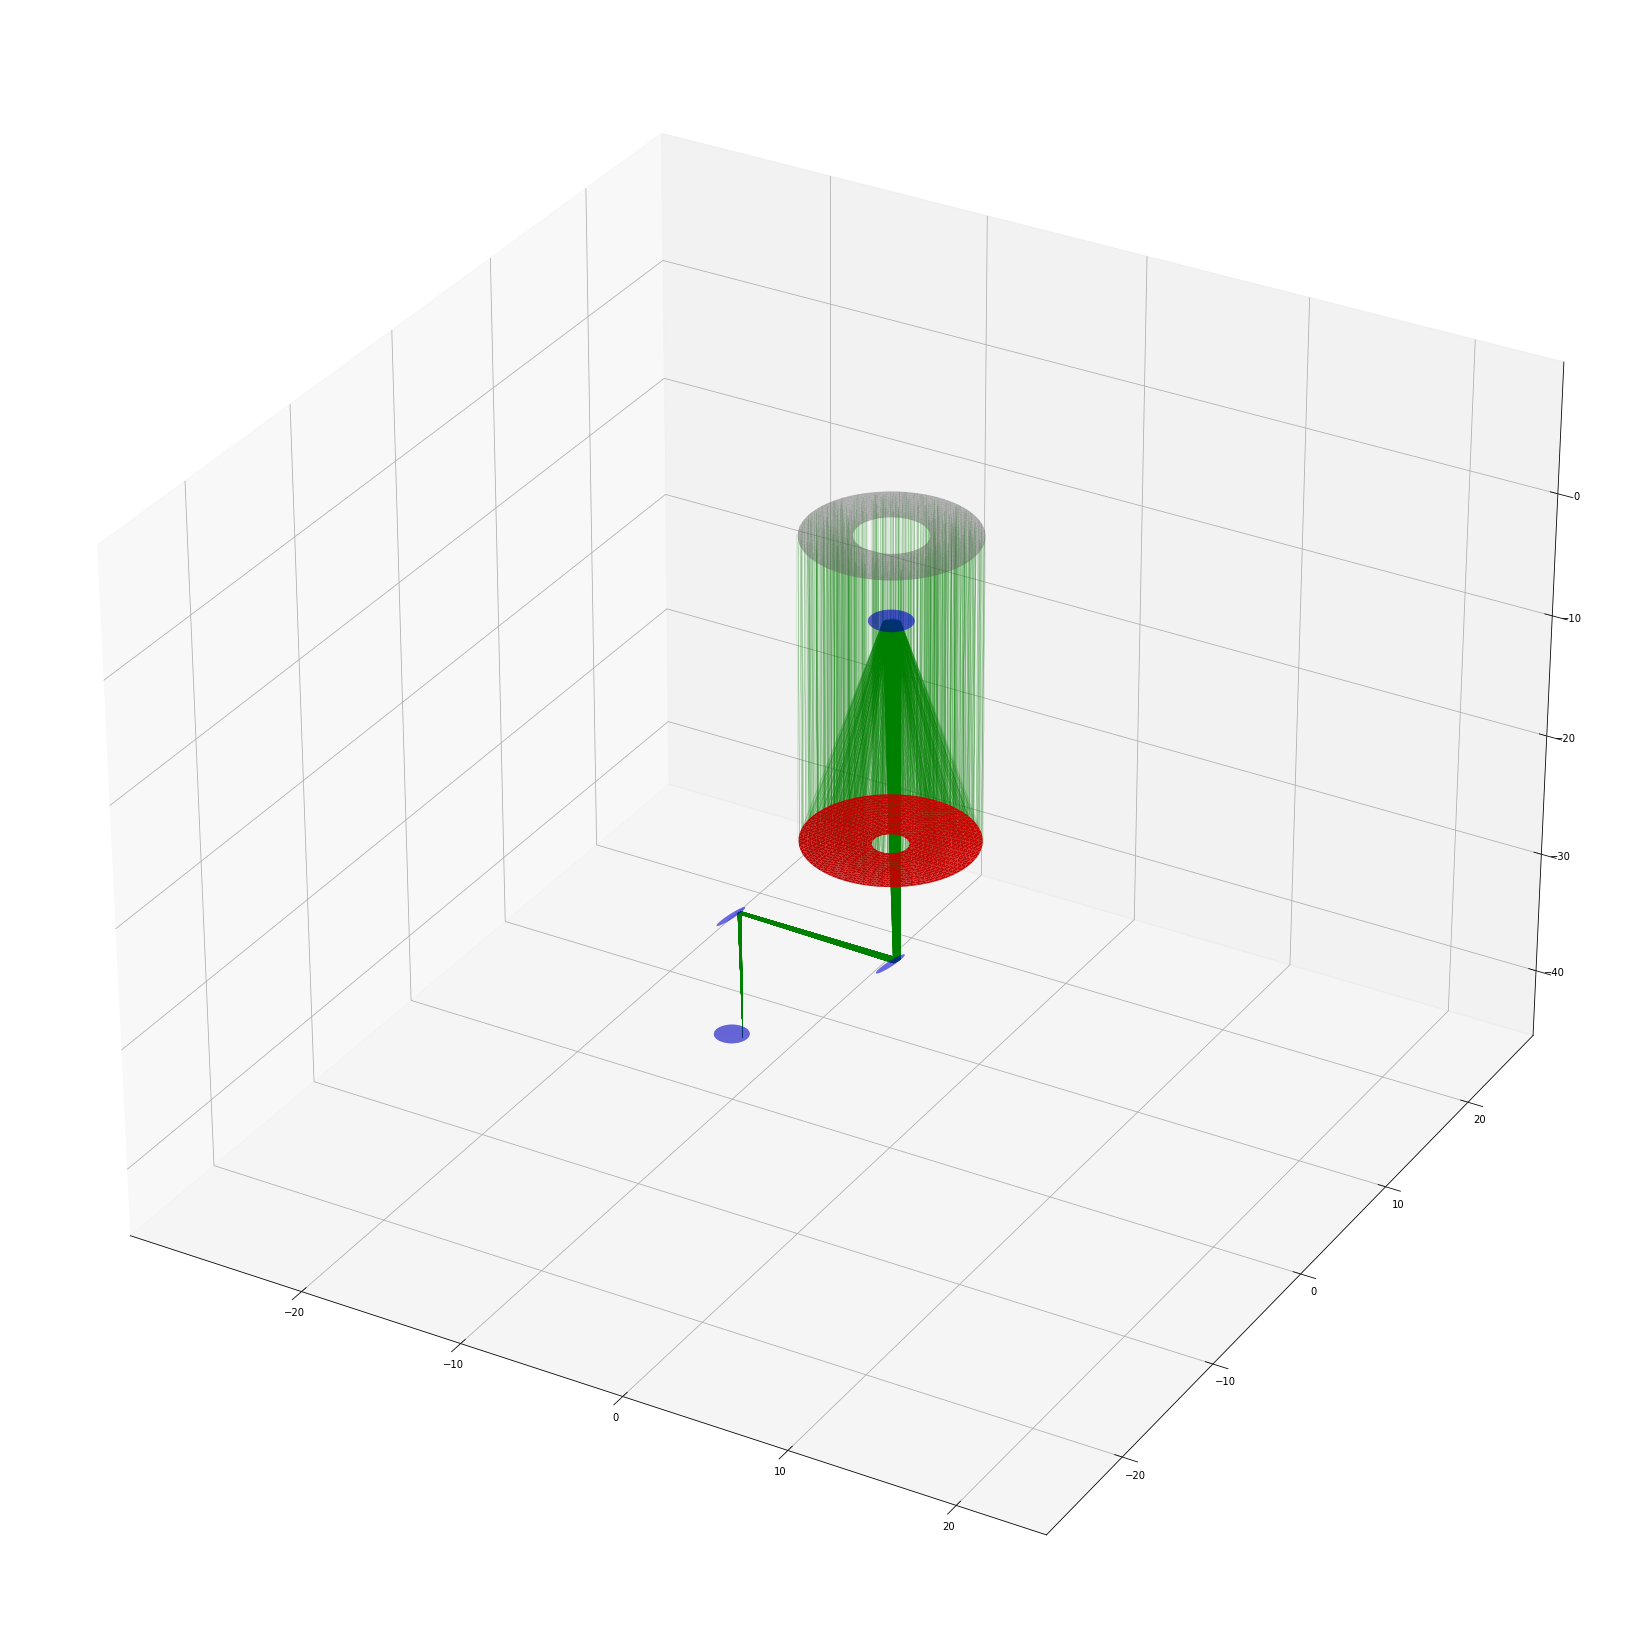

In [222]:
import pimms.optics as op
reload(op)
m0=op.SymmetricQuadricMirror(4., 10.,  f=np.inf, g=np.inf,b=(-1,-1),p=(0,0,5))
m1=op.SymmetricQuadricMirror(2., 10.,  f=20., g=np.inf, b=(1,1))
m2=op.SymmetricQuadricMirror(0.,  2.5, f=2., g=-48, b=(1,1))
#d1=op.SymmetricQuadricMirror(0.,  2., f=np.inf, g=np.inf, p=(0,0,-30), b=(0,0))
m3=op.SymmetricQuadricMirror(0.,  2.,  f=np.inf, g=np.inf, p=(0,0,-30), b=(1,1), q=op.quat.from_angles(0., np.pi/4.))
m4=op.SymmetricQuadricMirror(0.,  2.,  f=np.inf, g=np.inf, p=(-10.,0,-30.), b=(1,1), q=op.quat.from_angles(0., np.pi/4.))
d1=op.SymmetricQuadricMirror(0.,  2.,  f=np.inf, g=np.inf, p=(-10,0,-40), b=(0,0))
assembly=op.OpticalAssembly()
m0.is_virtual=True
m1.is_primary=True
assembly.add_part(m0)
assembly.add_part(m1)
assembly.add_part(m2)
assembly.add_part(m3)
assembly.add_part(m4)
assembly.add_part(d1)
s=op.LightSource((np.pi,np.deg2rad(5./60.),np.inf))
p,q=s([m0], 1000, 1e-3)
trace,seq=assembly.trace(q,steps=6)
fig=plt.figure(figsize=(30,30))
ax=fig.add_subplot(111,projection='3d')
trigs,zs,extent=assembly.draw(axes=ax,draw_virtual=True,raytrace=trace)

In [197]:
seq

array([[-1, -1, -1, ..., -1, -1, -1],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 1,  1,  1, ...,  1,  1,  1],
       ...,
       [ 3,  3,  3, ...,  3,  3,  3],
       [ 4,  4,  4, ...,  4,  4,  4],
       [ 5,  5,  5, ...,  5,  5,  5]], dtype=int16)